# Week2授業課題 富士下山

この課題の目的
- 機械学習で使われている勾配降下法の仕組みを知る

## 富士山から下りたい


授業前課題2では「勾配降下法」に触れました。勾配降下法は山や谷を下ることに例えられます。先週は紙を折って超えることを目指した富士山を、今週は頂上付近から下りていくことにしましょう。

### 断面図の確認

以下の図は富士山の断面図です。相模湾から富士山頂上付近を通り南アルプス方面へと切り取りました。縦軸は標高、横軸は300等分した番号が振られています。

![](image/image1.png)

この断面図を見れば低い場所はすぐに分かりますが、あなたは暗闇の中、赤い点の箇所(x=136)にいるという状況を想像します。足元の傾きしか分からない中で富士山から下りるというプログラムを作っていきましょう。

出典

今回使用するデータは国土地理院の電子地形図の断面図機能を使用し取得しました。

[立体地図（日本の主な山岳）](https://cyberjapandata.gsi.go.jp/3d/mountain/mountain.html)

### データの取得

このデータをcsvファイルで配布しますので、以下のコードで読み込みます。

```python
import numpy as np
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する
fuji = np.loadtxt("week2_session1_mtfuji_data.csv",delimiter=",", skiprows=1)
```

一部を出力させると、以下のような中身になっています。

![](image/image2.png)

左から順番に「その地点の番号(x)」「緯度」「経度」「標高(elevation)」「地点0からの距離」となっています。標高と距離の単位はメートルです。

## 【問題1】 断面図の作成

前述の断面図をMatplotlibを使い作成してください。x=136の地点の赤い点や矢印も表示させてください。

これ以降の問題では下りる過程の可視化を行いますが、その際にはこの断面図を活用してください。

In [1]:
import numpy as np
np.set_printoptions(suppress=True) # 指数表示の禁止を設定する

#データの取得
fuji = np.loadtxt("week2_session_mtfuji_data.csv",delimiter=",", skiprows=1)

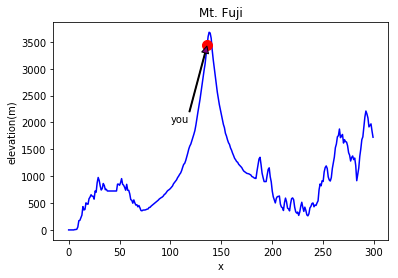

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

#断面図を描写
plt.title("Mt. Fuji")
plt.xlabel("x")
plt.ylabel("elevation(m)")
plt.plot(fuji[:, 0], fuji[:, 3], color='blue')
plt.plot(136, fuji[136,3], marker = 'o', color = 'red', markersize = 10)

#矢印をつける
plt.annotate('you', xy=(136, fuji[136, 3]), xytext=(100, 2000), 
             arrowprops = dict(facecolor='purple', width =1.0, headwidth=7.0, headlength=7.0, shrink=0.01));

## 【問題2】 勾配の計算の関数

授業前課題では各地点での勾配を最初に求めました。しかし、暗闇の富士山の比喩を考えると、知ることができるのはあなたがいる地点の勾配だけです。

ここでは「あなたが今いる地点x」と「その隣の地点x-1」の関係による勾配を求める関数を作成しましょう。この関数が返す値を「今いる地点の勾配」として次の問題で作成する関数内で使ってください。

勾配は授業前課題で行ったように、以下の計算で求まります。



![](image/image2_2.png)

このデータでは「標高（elevation)」がyに相当します。xはそのまま「その地点の番号(x)」です。

In [3]:
'''
勾配を求める関数
-------------------------
input
現在の地点：x
勾配データ : data(デフォルト 富士山の断面図 : fuji)

output
今の地点の勾配
'''
def gradient_calculate(x, data=fuji):
    
    #今いる地点が1~299の場合
    if 1 <= x and x <= 299:
        #xの変化量
        delta_x = data[x, 0] - data[x-1, 0]
        #yの変化量
        delta_y = data[x, 3] - data[x-1, 3]

        return delta_y / delta_x

    #1~299以外の場合
    else:
        print('1~299の整数で入力してください')

In [4]:
#今いる地点xが136のときの勾配
gradient_calculate(136)

168.35000000000036

## 【問題3】 勾配降下法の関数を作成

授業前課題では説明までとした勾配降下法ですが、これを行う関数を作成してください。

数式で表すと 「移動すべき地点 = 今いる地点 - 
α
 ×今いる地点の勾配」 となります。

この関数を使い、あなたが今いるxが136の地点（標高3434.59[m]）から、山を下っていきましょう。移動毎の標高はリストに記録し、その過程を可視化してください。断面図を目視したり、読み込んだ数値を確認して分かることと比べてどうなっているでしょうか。

実装上の注意

移動すべき地点は基本的には少数となりますが、勾配の情報は整数値の場所でしか得られません。そのため、四捨五入により整数値に変換する必要があります。

可視化のヒント

断面図の中に点を表示したり、繰り返し毎の標高や勾配を折れ線グラフで見てみることができます。

α
 の補足

α
 は0より大きい任意の値をとるハイパーパラメータです。機械学習の分野では学習率という名前で呼ばれます。この値によって下り方が変わりますから、関数の引数にしてください。複数試し、うまく下りられる 
α
 の値を見つけましょう。

初期値の補足

最初に居たx=136の地点のことを初期値と呼びます。この初期値によってどこに下っていくかが変わりますから、これも関数の引数にしてください。

In [5]:
'''
勾配降下法の関数：gradient_descent_method

input
今いる地点：x
学習率：a(デフォルト : 0.2)
勾配データ : data(デフォルト 富士山の断面図 : fuji)

output
移動すべき地点
'''
def gradient_descent_method(x, a=0.2, data=fuji):
    
    #今いる地点が1~299の場合
    if 1 <= x and x <=299:
        return int(round(data[x, 0] - a * gradient_calculate(x)))
    
    #1~299以外の場合
    else:
        print('1~299の整数で入力してください')

In [6]:
#xが136の時
x = 136
x_movement = []

#勾配が正の時、勾配が0以下になる手前まで移動する
if gradient_calculate(x) > 0:
    while gradient_calculate(x) >= 0:
        
        #リストの過程を追加
        x_movement.append(x)
        
        #xの地点を更新
        x = gradient_descent_method(x)

        
#勾配が負の時、勾配が0以上になる手前まで移動する
else:
    while gradient_calculate(x) <= 0:
        
        #リストの過程を追加
        x_movement.append(x)
        
        #xの地点を更新
        x = gradient_descent_method(x)

#過程のリストを出力
print(x_movement)

[136, 102, 98, 95, 93, 89, 85, 82, 79, 73]


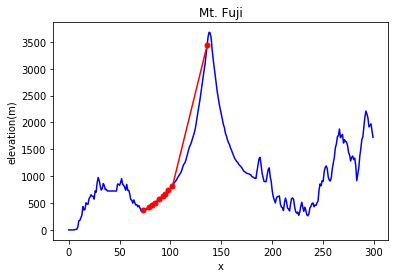

In [7]:
#グラフの描写
plt.title("Mt. Fuji")
plt.xlabel("x")
plt.ylabel("elevation(m)")
plt.plot(fuji[:, 0], fuji[:, 3], color='blue')
plt.plot(fuji[x_movement, 0], fuji[x_movement, 3], marker='o', color = 'red', markersize = 5);

## 【問題4】 初期値の変更

ここまでの問題では最初のxを136としましたが、xの初期値を変更すると結果が変化します。特にxを139より大きい値にすると、富士山の反対側の斜面を下りていくことになります。

そういった初期値を設定した上で、移動毎の標高はリストに記録し、その過程を可視化してください。



In [8]:
#xが139の時
x = 139
#ハイパーパラメータを0.3に設定
a = 0.3
x_movement = []

#勾配が正の時、勾配が0以下になる手前まで移動する

if gradient_calculate(x) > 0:
    while gradient_calculate(x) >= 0:
        
        #リストの過程を追加
        x_movement.append(x)
        
        #xの地点を更新
        x = gradient_descent_method(x, a)
        
#勾配が負の時、勾配が0以上になる手前まで移動する
else:
    while gradient_calculate(x) <= 0:
                
        #リストの過程を追加
        x_movement.append(x)

        #xの地点を更新
        x = gradient_descent_method(x, a)
        
#過程のリストを出力
print(x_movement)

[139, 144, 191, 216]


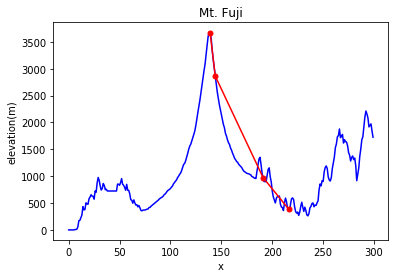

In [9]:
#グラフの描写
plt.title("Mt. Fuji")
plt.xlabel("x")
plt.ylabel("elevation(m)")
plt.plot(fuji[:, 0], fuji[:, 3], color='blue')
plt.plot(fuji[x_movement, 0], fuji[x_movement, 3], marker='o', color = 'red', markersize = 5);

## 【課題5】 並列計算

初期値によって結果が変化するわけですから、0から299まで全ての初期値の計算を行ってみるということを考えられます。

for文を使い繰り返すこともできますが、NumPyの配列を工夫して使うことで複数の計算を同時に行うことができます。ここまで作成した関数を複数の初期値が同時に計算できるように改良してください。

この改良は次のハイパーパラメータの検証にも応用することができます。

ヒント

NumPyは配列間で四則演算などの操作が可能です。以下のサンプルコードの3行目と4行目の挙動を参考にしてください。特に4行目の計算はブロードキャストと呼ばれるNumPy独特の機能であるため、各自でも調査してください。

```python
array1 = np.ones(300)
array2 = np.arange(300)
array3 = array1*array2
array4 = array3 + 1 # ブロードキャスト
```

In [10]:
#0~299の1次元配列を取得
array1 = np.ones(300)
array2 = np.arange(300)
array3 = (array1*array2).astype(int)

In [11]:
#勾配を求める関数を修正
def re_gradient_calculate(x, data=fuji):
        
    #xの変化量
    delta_x = data[x, 0] - data[x-1, 0]
    #yの変化量
    delta_y = data[x, 3] - data[x-1, 3]

    return delta_y / delta_x

In [12]:
#勾配降下法の関数を修正
def re_gradient_descent_method(x, a=0.3, data=fuji):
    
    #numpy配列の時
    if type(x) == np.ndarray:
        
        #配列の要素数を取得
        num = len(x)
        
        #配列の要素ごとに計算
        for i in range(num):
            
            #勾配が正の時、勾配が負になる手前まで移動する
            if re_gradient_calculate(x[i]) > 0:
                while re_gradient_calculate(x[i]) >= 0:
                   
                    #xを出力
                    print(x)
                    
                    #xを更新
                    x = np.round(data[x, 0] - a * re_gradient_calculate(x)).astype(int)  
            
            #勾配が負の時、勾配が正になる手前まで移動する
            else:
                while gradient_calculate(x[i]) <= 0:
                    
                    #xを出力
                    print(x)
                    
                    #xを更新
                    x = np.round(data[x, 0] - a * re_gradient_calculate(x)).astype(int)
    
    
    #numpy配列以外の時
    else:
            #xの過程のリスト
            x_movement = []
            
            #勾配が正の時、勾配が負になる手前まで移動する
            if re_gradient_calculate(x) > 0:
                while re_gradient_calculate(x) >= 0:
                    
                    #リストの過程を追加
                    x_movement.append(x)
                    
                    #xを更新
                    x = (data[x, 0] - a * re_gradient_calculate(x)).astype(int)
            
            #勾配が負の時、勾配が正になる手前まで移動する
            else:
                while re_gradient_calculate(x) <= 0:
                                    
                    #リストの過程を追加
                    x_movement.append(x)
                    
                    #xを更新
                    x = (data[x, 0] - a * re_gradient_calculate(x)).astype(int)
                    
            return x_movement

In [13]:
#xが130~132の範囲の時
re_gradient_descent_method(array3[130:133])

[130 131 132]
[89 89 95]
[83 83 91]
[79 79 87]
[71 71 82]
[86 86 77]
[82 82 74]
[77 77 73]
[74 74 69]


## 【課題6】 ハイパーパラメータの検証

勾配降下法の中で $\alpha$ はハイパーパラメータであり、前の問題でも複数試して良い結果が得られるものを探しました。これを発展させ、$\alpha$ を一定間隔で変化させていき、それぞれの山の下り方の比較を行ってください。うまい下り方となる $\alpha$ を見つけるだけではなく、大きかったり小さかった時にどうなるのかを検証して説明してください。

ヒント

検証のための一例として、横軸を $\alpha$ 、縦軸を一定回の繰り返し後のxや標高にした散布図を描いてみるという方法が考えられます。

In [14]:
#ハイパーパラメータを0.1~0.4、0.01間隔で作成
a = np.arange(0.1, 0.41, 0.01)
a

array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 ])

In [15]:
#ハイパーパラメータを変えたときの最後の位置のリスト
hyper_x = []

#ハイパーパラメータの数だけ実行
for i in range(len(a)):
    
    #勾配降下法
    x = re_gradient_descent_method(136, a[i])
    
    #最後の位置をリストに格納
    hyper_x.append(x[-1])

print(hyper_x)

[73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 73, 79, 79, 79, 79, 79, 69, 79, 69, 79, 73, 73, 69, 73, 73, 73, 73, 136, 136, 136]


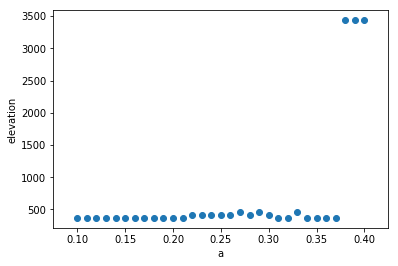

In [16]:
#グラフの出力、縦軸に標高、横軸にハイパーパラメータ
plt.xlabel('a')
plt.ylabel('elevation')
plt.scatter(a, fuji[hyper_x, 3]);

ハイパーパラメータが0.1~0.37の間では、ある程度低い位置まで山を降りることができていたが、ハイパーパラメータが0.38を超えると、山を降りることができなかった。つまり、ハイパーパラメータを大きくしすぎると、勾配降下法による最小値を求めることが難しくなる。

## 【課題7】局所最適解

山を下りることで最終的には海（標高が0）に向かいたいですが、勾配降下法は「局所的最適解」となる地点にしか到達しない可能性があります。局所的最適解とはどういったもので、それへの対策はどういったことができるかを調査して説明してください。

言葉だけではなく、作成した関数も活用できると良いでしょう。



局所最適解とは、ある範囲における最適解のことで、例えば、グラフに谷が複数存在する場合、ある谷の最小値が最適解になるといったものであり、その位置が全体の最適解になるとは限らないものである。
対策として、ミニバッチごとに勾配降下法を適用する確率勾配降下法(SGD)や、SGDを改良して慣性を加えたMoment SGDや、慣性に加えて一歩先の位置で勾配を使うNesterov accelerated gradient(NAG)などがある。